### Задание

Используя приложенный файл данных, выполните следующие задания:

- Оцените, какие признаки вносят значимый вклад в разделение рубрик на геозависимые и геонезависимые, и оставьте для включения в модель только те, которые значимо дифференцируют рубрики.
- Выберите две модельи наиболее, на Ваш взгляд, подходящие для решения задачи классификации рубрик. Кратко (1-2 абзаца) обоснуйте свой выбор.
- Постройте первую из двух выбранных моделей, кратко охарактеризуйте вклад отдельных признаков в "судьбу" рубрики: что "способствует" геозависимости, а что, напротив, освобождает рубрику от территориальной привязки?
- Постройте вторую модель, сравните результат, полученный на разных моделях.
- Коротко (на 1-2 абзаца) объясните различия в результате, если таковые будут выявлены.
- Постройте прогноз для нескольких (2-3) рубрик: в какой класс они попадут и с какой вероятностью?

### Данные

Посмотрим на данные, построим графики, оценим признаки

In [79]:
import pandas as pd
data = pd.read_csv("Data_Projects.csv", sep=';', decimal=',')

In [80]:
data

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,0.416104,0.535762,1125,749.966084,1
1,17,37,258,20,0.211679,0.430657,157,2289.032424,0
2,78,56,1956,185,0.349475,0.476594,1195,1423.376512,1
3,14,70,378,19,0.318718,0.463744,206,3396.566089,0
4,111,90,4089,90,0.556175,0.490573,2934,1576.514154,1
...,...,...,...,...,...,...,...,...,...
74,2535,12436,44597,113,0.364710,0.388519,11172,1908.108110,0
75,1103,12805,33388,411,0.415795,0.549773,13911,2642.200165,0
76,3132,20609,75303,409,0.308071,0.470916,23982,2278.162917,0
77,5740,47912,167155,1457,0.427646,0.595409,61127,989.412139,0


In [81]:
data.corr()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
AddressCount,1.000000,0.618009,0.911155,0.670168,0.201072,0.412753,0.933225,-0.359379,0.323899
CallsCount,0.618009,1.000000,0.838606,0.470456,0.148431,0.241862,0.722171,-0.240452,0.086014
ClicksCount,0.911155,0.838606,1.000000,0.714979,0.243448,0.416174,0.974676,-0.360231,0.308041
FirmsCount,0.670168,0.470456,0.714979,1.000000,0.403079,0.311372,0.747713,-0.478833,0.376945
GeoPart,0.201072,0.148431,0.243448,0.403079,1.000000,0.306338,0.256766,-0.567236,0.434534
MobilePart,0.412753,0.241862,0.416174,0.311372,0.306338,1.000000,0.479752,-0.520953,0.538959
UsersCount,0.933225,0.722171,0.974676,0.747713,0.256766,0.479752,1.000000,-0.383958,0.398542
Distance,-0.359379,-0.240452,-0.360231,-0.478833,-0.567236,-0.520953,-0.383958,1.000000,-0.565264
IsGeo,0.323899,0.086014,0.308041,0.376945,0.434534,0.538959,0.398542,-0.565264,1.000000


In [82]:
y = data['IsGeo']
X = data.drop(['IsGeo'], axis='columns')

{'whiskers': [<matplotlib.lines.Line2D at 0x23050e6a708>,
 'caps': [<matplotlib.lines.Line2D at 0x23050ea1c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x23050e5b648>],
 'medians': [<matplotlib.lines.Line2D at 0x23050ea6b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x23050ea6e08>],
 'means': []}

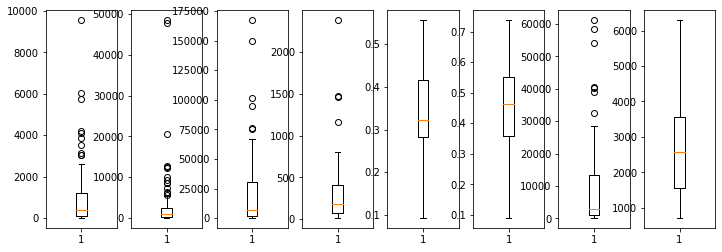

In [83]:
import matplotlib.pyplot as plt
_, axis = plt.subplots(ncols=8, figsize=(12, 4))
axis[0].boxplot(data['AddressCount'])
axis[1].boxplot(data['CallsCount'])
axis[2].boxplot(data['ClicksCount'])
axis[3].boxplot(data['FirmsCount'])
axis[4].boxplot(data['GeoPart'])
axis[5].boxplot(data['MobilePart'])
axis[6].boxplot(data['UsersCount'])
axis[7].boxplot(data['Distance'])


(array([15., 12., 11., 10., 11.,  6.,  7.,  1.,  3.,  3.]),
 array([ 714.7872362 , 1272.52924372, 1830.27125124, 2388.01325876,
        2945.75526628, 3503.49727379, 4061.23928131, 4618.98128883,
        5176.72329635, 5734.46530387, 6292.20731139]),
 <a list of 10 Patch objects>)

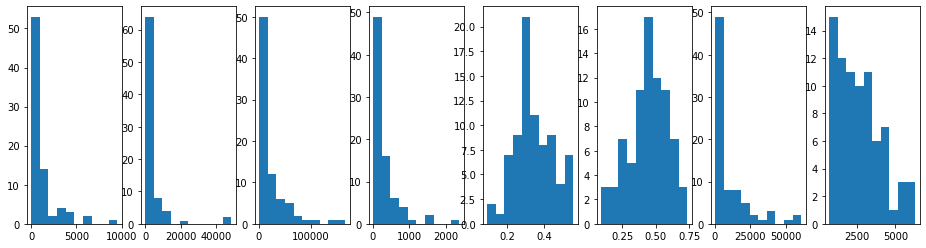

In [84]:
import matplotlib.pyplot as plt
_, axis = plt.subplots(ncols=8, figsize=(16, 4))
axis[0].hist(data['AddressCount'])
axis[1].hist(data['CallsCount'])
axis[2].hist(data['ClicksCount'])
axis[3].hist(data['FirmsCount'])
axis[4].hist(data['GeoPart'])
axis[5].hist(data['MobilePart'])
axis[6].hist(data['UsersCount'])
axis[7].hist(data['Distance'])


In [117]:
X = X[X['FirmsCount'] < 2000]
data = data[data['FirmsCount'] < 2000]
y = data['IsGeo']

In [86]:
X.corr()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance
AddressCount,1.000000,0.621184,0.911533,0.811500,0.194179,0.412330,0.937297,-0.355807
CallsCount,0.621184,1.000000,0.846491,0.626577,0.160266,0.242780,0.736553,-0.248272
ClicksCount,0.911533,0.846491,1.000000,0.837546,0.228674,0.416226,0.975849,-0.351528
FirmsCount,0.811500,0.626577,0.837546,1.000000,0.346878,0.380148,0.841365,-0.500639
GeoPart,0.194179,0.160266,0.228674,0.346878,1.000000,0.309554,0.231311,-0.554618
MobilePart,0.412330,0.242780,0.416226,0.380148,0.309554,1.000000,0.482357,-0.523602
UsersCount,0.937297,0.736553,0.975849,0.841365,0.231311,0.482357,1.000000,-0.370047
Distance,-0.355807,-0.248272,-0.351528,-0.500639,-0.554618,-0.523602,-0.370047,1.000000


### PCA

Поскольку большая часть признаков скоррелирована, то отделение эффекта каждого фактора затруднительно + не подходит для наивного байеса. Оценим применимость факторного анализа, при положительном результате применим PCA.

Исходя из матрицы корреляции уже можно сделать вывод о том, что ФА/PCA применимы, но проверим критериями КМО и Бартлетта:

In [87]:
!pip install factor-analyzer

In [88]:
import factor_analyzer
from factor_analyzer import FactorAnalyzer

In [89]:
_, p_value_bartlet = factor_analyzer.factor_analyzer.calculate_bartlett_sphericity(X)

In [90]:
_, p_value_kmo = factor_analyzer.factor_analyzer.calculate_kmo(X)

In [91]:
p_value_bartlet, p_value_kmo

(8.824928170727435e-143, 0.7403915463256981)

Как мы видим H0 о диагональности корреляционной матрицы отвергается, статистика критерия КМО > 0.7 => ФА применим. 

В нашем случае основной целью будет сокращение к-ва фич, а не их классификация, поэтому применим PCA.

Для оценки к-ва значимых компонент используем метод Кайзера.

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
X_norm = StandardScaler().fit_transform(X)

In [108]:
from sklearn.decomposition import PCA

In [109]:
X_ = pd.DataFrame(X_norm)
(X_.cov() > X_.cov().to_numpy().trace() /X_.cov().shape[0]).to_numpy().trace().sum()


3

In [110]:
pca = PCA(n_components=3, svd_solver='full')

In [111]:
pca.fit(X_norm)

PCA(n_components=3, svd_solver='full')

In [112]:
pca.explained_variance_ratio_.sum()

0.871443046265559

In [133]:
pca_x = pca.transform(X_norm)

### Модели

Поскольку:
- У нас мало примеров
- У нас вследствие PCA выполняется предположение о некоррелированность признаков

Возьмем в качестве моделей Лин.регрессию и Байесовский классификатор.

In [118]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y)

In [128]:
from collections import Counter

In [131]:
Counter(y_test)

Counter({1: 6, 0: 10})

Отобразим разбиение на графике по первым 2 фичам:

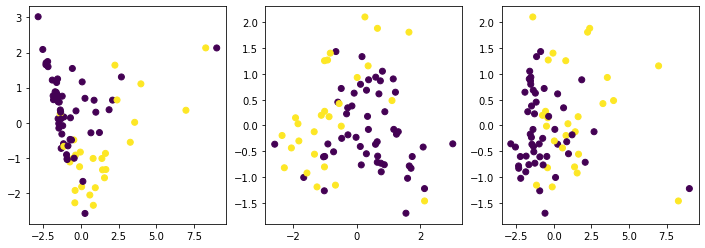

In [151]:
_, axis = plt.subplots(ncols=3, figsize=(12, 4))
axis[0].scatter(pca_x[:, 0], pca_x[:, 1], c=y)
axis[1].scatter(pca_x[:, 1], pca_x[:, 2], c=y)
axis[2].scatter(pca_x[:, 0], pca_x[:, 2], c=y)

Как мы видим, наши данные +- линейно разделимы, так что лин.регрессия будет неплоха

In [153]:
from sklearn.linear_model import LinearRegression

In [158]:
linr = LinearRegression()

In [159]:
linr.fit(X_train, y_train)

LinearRegression()

In [160]:
linr.score(X_test, y_test)

0.3849070638677923

In [162]:
preds = linr.predict(X_test)

In [165]:
(preds > 0.5).astype(int)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [167]:
from sklearn.metrics import accuracy_score

In [169]:
accuracy_score((preds > 0.5).astype(int), y_test)

0.75

Вышло качество не очень, проверим на SVC нет ли ошибки при использовании LR:

In [172]:
from sklearn.svm import SVC
svc = SVC()

In [173]:
svc.fit(X_train, y_train)

SVC()

In [177]:
preds_ = svc.predict(X_test)

In [178]:
accuracy_score(preds_, y_test)

0.6875

In [179]:
preds_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

Вышло качество еще хуже => сама модель ЛР нормальная, просто данные сложнолинейно разделимы

#### Bayes:

In [182]:
from sklearn.naive_bayes import GaussianNB

In [183]:
nbm = GaussianNB()

In [184]:
nbm.fit(X_train, y_train)

GaussianNB()

In [185]:
preds_b = nbm.predict(X_test)

In [186]:
preds_b

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [187]:
accuracy_score(preds_b, y_test)

0.75

Качество вышло как и у линейной регрессии. Для лучшего качества нужно больше примеров.

Попробуем еще дерево решений, оно выдает лучший результат. 

In [188]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
dtc = DecisionTreeClassifier()

In [190]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [193]:
preds__ = dtc.predict(X_test)

In [194]:
accuracy_score(preds__, y_test)

0.8125

Таким образом, приведено сравнение нескольких простых классификаторов. Наилучший результат показало дерево решений. Можно предположить, что ансамбль деревьев выдаст лучший результат, но нужно больше данных.

Исходные признаки сильно скоррелированы и применение PCA помогает сократить количество переменных и сделать возможным применение NBC.